In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# run once
df = sns.load_dataset('iris')
df = df.sample(frac=1).reset_index(drop=True).iloc[:100,]
df = df[["sepal_length","sepal_width","species"]]
df.to_csv('knn.csv',index=False)

In [3]:
df = pd.read_csv("./knn.csv")

In [4]:
df.head()

,sepal_length,sepal_width,species
0,7.9,3.8,virginica
1,5.7,2.9,versicolor
2,6.5,3.2,virginica
3,5.0,3.4,setosa
4,6.6,2.9,versicolor


In [5]:
df['species'].unique()

array(['virginica', 'versicolor', 'setosa'], dtype=object)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

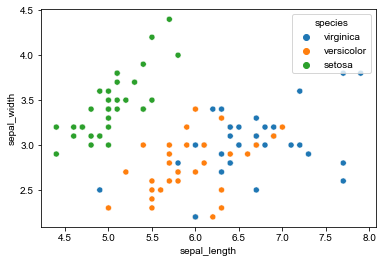

In [6]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

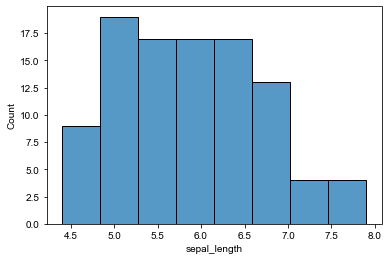

In [7]:
sns.histplot(data=df,x='sepal_length')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

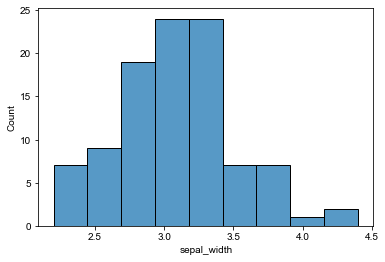

In [8]:
sns.histplot(data=df,x='sepal_width')

<AxesSubplot:>

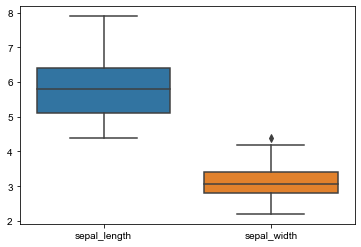

In [9]:
sns.boxplot(data=df)

In [10]:
X = df.drop(['species'],axis=1)
Y = df['species']

In [11]:
from sklearn import model_selection

In [12]:
Xtrain,Xtest,YTrain,YTest = model_selection.train_test_split(X,Y,random_state=67,test_size=0.4)

In [13]:
def computeDistance(P1,P2):
    return abs(P1.iloc[0,] - P2.iloc[0,]) + abs(P1.iloc[1,] - P2.iloc[1,])

In [17]:
scores = []

In [18]:
for i in range(len(Xtest)):
    distances = []
    for j in range(len(Xtrain)):
        distances.append([round(computeDistance(Xtest.iloc[i],Xtrain.iloc[j]),2),YTrain.iloc[j]])
    scores.append(max([row[-1] for row in sorted(distances)[:5]]) == YTest.iloc[i])

In [21]:
scores.count(False)/len(scores)
scores.count(True)/len(scores)

0.55

## Via Sklearn

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
knn.fit(Xtrain,YTrain)

KNeighborsClassifier()

In [21]:
ypred = knn.predict(Xtest)

In [22]:
knn.score(Xtest,ypred)

1.0